# Composing linear transformations

**Lemma.** Let $T: \mathbb{R}^k \longrightarrow \mathbb{R}^n$ and $S: \mathbb{R}^n \longrightarrow \mathbb{R}^m$ be linear transformations represented by matrices $A,B$ respectively. Then $S\circ T:\mathbb{R}^n\longrightarrow\mathbb{R}^n$ is represented by the matrix $BA$.


In [2]:
def plot_image_matrix(*matrices,colors=[],labels=[],includeorigin=True):
    """Plot points in matrices. Return graphic object containing the pictures, use show(..) to see it"""
    if colors == []:
        colors = ['blue','red','purple','green','brown'] # default colors list
    if labels == []:
        labels = ['matrix' + str(i) for i in range(len(matrices))]
    if includeorigin:
        g = list_plot([(0,0)],color='white') # add the invisible point at origin so we see axes
    else:
        g = list_plot([])
    for i in range(len(matrices)):
        mat = matrices[i]
        ptstoplot = list(map(lambda col: (col[0],col[1]), mat.columns())) # use only first two coordinates
        lb = labels[i]
        c = colors[i]
        g = g + list_plot(ptstoplot,plotjoined=True,
                          marker='o',legend_label=lb,color=c)
    return g

def rotmat(theta):
    """Rotation matrix by angle t radians counter-clockwise around the origin"""
    col1 = (cos(theta),sin(theta))
    col2 = (-sin(theta),cos(theta))
    return matrix([col1,col2]).T

### Example.
Consider the following the letter "M" given by the image matrix $P$. 

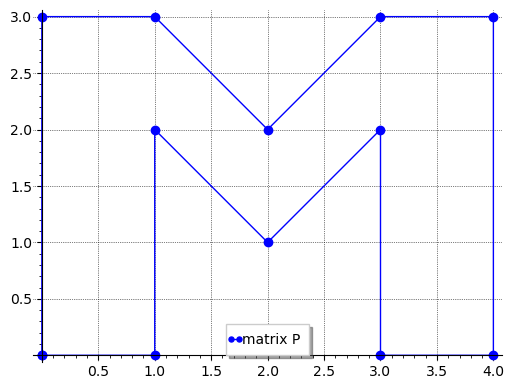

In [3]:
pts = [(0.,0.) ,(0.,3.) ,(1.,3.) ,(2.,2.) ,(3.,3.) ,(4.,3.) ,(4.,0.),(3.,0.) ,(3.,2.) ,(2.,1.) ,(1.,2.) ,(1.,0.) ,(0,0)]
P = matrix(pts).T
pic = plot_image_matrix(P,labels=['matrix P'])
show(pic,gridlines=true,aspect_ratio=1)

Reflect it about the $x$-axis and then reflect the resulting image about the line $y=x$. 

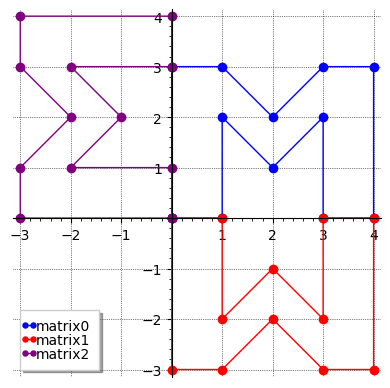

In [5]:
#A1 reflection about x axis
A1 = matrix(2,2,[1,0,
                 0,-1])

#A2 reflect about y=x
A2 = matrix(2,2,[0,1,
                 1,0])

P1 = A1*P
P2 = A2*P1
pic = plot_image_matrix(P,P1,P2)
show(pic,gridlines=true,aspect_ratio=1)

What is the matrix $A$ such that $AP$ gives the final image?

[ 0 -1]
[ 1  0]


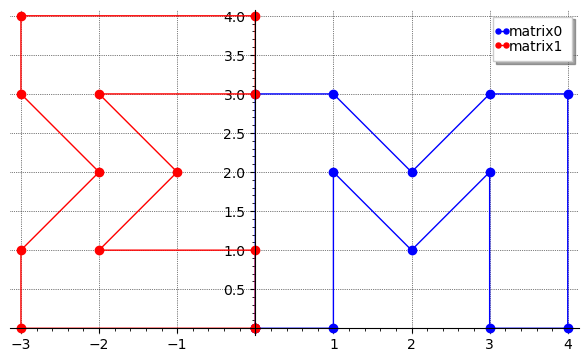

In [8]:
A = A2*A1
print(A)
P3 = A*P
pic = plot_image_matrix(P,P3)
show(pic,gridlines=true,aspect_ratio=1)

### Example.

Let $P$ be an image matrix of the following "stealth bomber". (Run the codes to see the picture.)

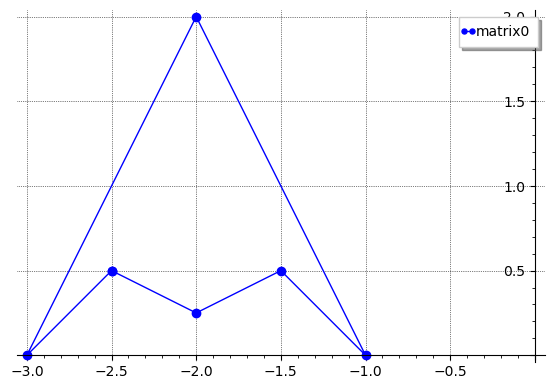

In [10]:
pts =[(-2.5,0.5) ,(-3,0) ,(-2,2) ,(-1,0) ,(-1.5,0.5) ,(-2,0.25),(-2.5,0.5)]
P = matrix(pts).T
pic = plot_image_matrix(P)
show(pic,gridlines=true,aspect_ratio=1)

Perform the following actions consecutively (each action is applied to the previous result). 
1. Reflect about the $x$-axis.
2. Rotate by $60^\circ$ couter-clockwise around the origin.
3. Reflect about the line $y=x$.

Create a picture of this sequence of transformations. 

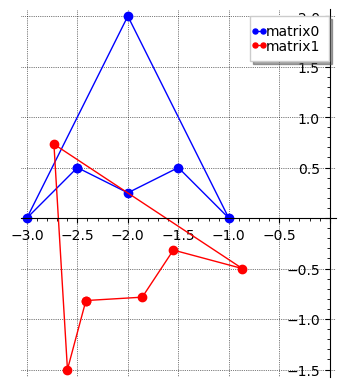

In [14]:
#A1 reflection about x axis
A1 = matrix(2,2,[1,0,
                 0,-1])
P1 = A1*P


#A2 rotation 60 degrees ccw
A2 = rotmat(pi/3)
P2 = A2*P1

#A3 reflect about y=x
A3 = matrix(2,2,[0,1,
                 1,0])

P3 = A3*P2

pic = plot_image_matrix(P,P3)
show(pic,gridlines=true,aspect_ratio=1)

Find the matrix $A$ such that $AP$ gives the final image.

In [15]:
A = A3*A2*A1
print(A)

P4 = A*P


[1/2*sqrt(3)        -1/2]
[        1/2 1/2*sqrt(3)]
